# Predicting Star Ratings of Edinburgh Airbnbs through Review Texts Analysis

## Notebook 1: Data Cleaning and EDA

In this notebook, we will first outline the objectives of the project, then we will begin the foundational steps of data cleaning and basic exploratory data analysis.

## Introduction

#### Problem Statement

For this analysis, the focus lies in the quest to improve the hosting experience on Airbnb, particularly in the city of Edinburgh. One challenge Airbnb hosts face is understanding what factors contribute to 
their Airbnb listing's star ratings, which significantly impact their bookings and revenue.

We aim to uncover valuable insights by analyzing review texts. Our primary goal is to predict average star ratings based on these reviews, providing hosts with actionable feedback on areas of improvement. By extracting key features from reviews, such as cleanliness, communication, and amenities, we can offer guidance to both new hosts seeking to establish themselves and experienced hosts looking to enhance their offerings. 

Ultimately, this analysis aims to empower hosts by providing useful insights and actionable recommendations to enhance their performance and maximize their ratings. Furthermore, we aim for these insights to not only benefit hosts in Edinburgh but also serve as valuable guidance for hosts in other cities facing similar challenges in the competitive Airbnb landscape.

#### Data Collection

The data used in this project consists of two datasets downloaded from [Inside Airbnb](http://insideairbnb.com/get-the-data). The first dataset contains information about Edinburgh Airbnb Listings, and the second dataset contains the reviews of these listings.

The data dictionary can be downloaded [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596).

## Data import and Data cleaning

#### Import libraries

In [1]:
# Import libraries

# Main libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Dictionaries

In [2]:
# Run below codes to reveal all texts in the dataframe by removing the hashtags.

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', None)

In [3]:
# Import raw data dictionary csv
df_dictionary = pd.read_csv('data/Data Dictionary.csv')

# Drop the first 6 unnecessary rows
df_dictionary_clean=df_dictionary.drop(range(6), axis=0)

# Reset index
df_dictionary_clean.reset_index(drop=True, inplace=True)

# Use the first row as column rows
df_dictionary_clean.columns=list(df_dictionary_clean.loc[0])

# Remove the first row
df_dictionary_clean.drop(0, inplace=True, axis=0)

# Reset index
df_dictionary_clean.reset_index(inplace=True, drop = True)

# Drop the 'Calculated' and 'Reference' column
df_dictionary_clean.drop(['Calculated', 'Reference'], axis=1, inplace=True)

# Show the dataframe
df_dictionary_clean

,Field,Type,Description
0,id,integer,Airbnb's unique identifier for the listing
1,listing_url,text,NaN
2,scrape_id,bigint,"Inside Airbnb ""Scrape"" this was part of"
3,last_scraped,datetime,"UTC. The date and time this listing was ""scrap..."
4,source,text,"One of ""neighbourhood search"" or ""previous scr..."
...,...,...,...
74,reviews_per_month,numeric,The number of reviews the listing has over the...
75,NaN,NaN,NaN
76,Change control,NaN,NaN
77,Field,Change,NaN


# Rating types overview

#### review_scores_rating	
- Overall experience. Overall, how was the stay?

#### review_scores_cleanliness
- Cleanliness. Did guests feel that the space was clean and tidy?

#### review_scores_accuracy
- Accuracy. How accurately did the listing page represent the space? For example, guests should be able to find up-to-date info and photos in the listing description.

#### review_scores_value
- Value. Did the guest feel that the listing provided good value for the price?

#### review_scores_communication
- Communication. How well did you communicate before and during the stay? Guests often care that their host responds quickly, reliably, and frequently to their messages and questions.

#### review_score_checkin
- Check-in. How smoothly did check-in go?


#### review_score_location
- Location. How did guests feel about the neighbourhood? This may mean that there’s an accurate description for proximity and access to transportation, shopping centres, city centre, etc., and a description that includes special considerations, like noise, and family safety.

#### Import datasets

In [4]:
# Import datasets
df_listings= pd.read_csv('data/listings.csv')
df_reviews=pd.read_csv('data/reviews.csv')

#### Check the dimensions of the datasets

In [5]:
# Show the shape of the listing dataframe
df_listings.shape

(7049, 75)

In [6]:
# Show the first row of the listing dataframe
# As we have too many columns, we will make a matrix transpose to show all information
df_listings.head(1).T

,0
id,15420
listing_url,https://www.airbnb.com/rooms/15420
scrape_id,20231217045056
last_scraped,2023-12-17
source,city scrape
...,...
calculated_host_listings_count,1
calculated_host_listings_count_entire_homes,1
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0


In [7]:
# Show the first row of the reviews dataframe
df_reviews.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,15420,171793,2011-01-18,186358,Nels,My wife and I stayed at this beautiful apartme...


In [8]:
# Show the shape of the reviews dataframe
df_reviews.shape

(535577, 6)

In [9]:
# Show the columns of the listings dataframe
print(df_listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

There are a lot of features in the listing data. Our next step is to narrow down our feature domain. We can first remove the urls and scraping related columns. Then remove columns contain no values.

In [10]:
# Remove url and scrape related columns
ls=[]
for i in df_listings.columns:
    if ('url' in i) | ('scrape' in i):
        ls.append(i)
    df_listings_clean=df_listings.drop(ls, axis=1)
df_listings_clean.drop('source', axis=1, inplace=True)

In [11]:
# Remove columns contain no values
for i in df_listings_clean.columns:
    if df_listings_clean.isnull().sum()[i] == df_listings_clean.shape[0]:
        df_listings_clean.drop(i, axis=1, inplace=True)    

In [12]:
# Show the columns of the cleaned listing dataframe
df_listings_clean.columns

Index(['id', 'name', 'neighborhood_overview', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review'

##### Host columns

We can look through columns by types and remove irrelevant columns. First, we will check and deal with the host related columns.

In [13]:
# Create a list which has host related column names
host_columns=[]
for i in df_listings_clean.columns:
    if 'host' in i:
        host_columns.append(i)

In [14]:
# Show the host related column names
print(host_columns)

['host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']


We will remove the 'host_name' column as names are irrelevant for our analysis, also it will include plenty duplicate values. The 'host_neighbourhood' is dropped as it contains duplicate information compare to the 'host_location' column. We will also remove 'host_total_listings_count' and 'host_listings_count' as the 'calculated_host_listings_count' is the correct column showing the number of listings per host after checking. 

In [15]:
# Create an array contains number of listings per host
host_listing_num=df_listings_clean.groupby('host_id').count()['id']

# Check if the number of listings per host matches the 'calculated_host_listings_count' column
for i in host_listing_num.index:
    if host_listing_num[i] != df_listings_clean[df_listings_clean['host_id']==i]['calculated_host_listings_count'].unique():
        print(i, 'This one is wrong')
# No error appears so the column is good.

In [16]:
# Remove 'host_name','host_total_listings_count' and 'host_listings_count' columns
df_listings_clean.drop(['host_name','host_neighbourhood', 'host_total_listings_count', 'host_listings_count'],
                       inplace=True, axis=1)

##### Other columns

Then we will look through the columns and remove other irrelevant columns.

In [17]:
# Remove amentities
df_listings_clean.drop('amenities', axis=1, inplace=True)

The null values in the license columns consists a large proportion of all the rows. We will drop this column.

In [18]:
# Check the proportion of the null values in the license column
print("Percentage of Null Values % in the license column")
round(df_listings_clean['license'].isnull().sum()/len(df_listings_clean)*100, 2) #coverted into a percent(%) and round to 2 decimal places

Percentage of Null Values % in the license column


90.17

In [19]:
# Drop the license column
df_listings_clean.drop('license', axis=1, inplace=True)

We arrive at a dataframe containing possible useful columns. 

Let's check the number of duplicate rows and rows contain null values in the current dataframe.

In [20]:
# Check duplicates
df_listings_clean[df_listings_clean.duplicated()]

,id,name,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


Our next step is to investigate if each listing has enough reviews for us to perform review texts analysis. We will then remove the listings that have no reviews.

In [21]:
# Check if there are any null values in the reviews dataframe
df_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         35
dtype: int64

In [22]:
# Create a dataframe contains these null review data
null_reviews = df_reviews[df_reviews['comments'].isnull()]

In [23]:
# Check if the listings in the null_reviews dataframe have no reviews at all in the entire dataframe
df_reviews.groupby('listing_id').count().loc[null_reviews['listing_id']].isnull().sum()

id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

Therefore, we can use all the unique listing ids in the reviews dataframe to filter our listing dataframe.

In [24]:
# Remove these rows in the reviews dataframe
df_reviews_clean=df_reviews.drop(null_reviews.index, axis=0)

In [25]:
# Reset index
df_reviews_clean=df_reviews_clean.reset_index(drop=True)

In [26]:
# Extract listing ids that have reviews in the review dataframe
listing_has_reviews= df_reviews_clean.groupby('listing_id').count().index

In [27]:
# Select 'id' column as dataframe index
df_listings_clean.set_index('id', inplace=True)

# Remove rows that have ids not in the generated list and reset index.
df_listings_clean=df_listings_clean.loc[listing_has_reviews].reset_index()

To perform review analysis, we will need to use at least some review texts. Therefore, we will filter the listing further by only selecting the listings with more than 3 reviews.

In [28]:
# Filter listing data and only select listings with more than 3 reviews
review_counts=df_reviews_clean.groupby('listing_id').count()['id']

# Generate listing ids which has more than 3 reviews
filtered_list=[i for i in review_counts.index if review_counts[i]>=3]

In [29]:
# Select 'listing_id' column as dataframe index
df_listings_clean.set_index('listing_id', inplace=True)

# Remove rows that have ids not in the generated reviews filtered list and reset index.
df_listings_clean=df_listings_clean.loc[filtered_list].reset_index()

We will remove the reviews correspond to these listings in the review dataset as well.

In [30]:
# Select 'listing_id' column as dataframe index
df_reviews_clean.set_index('listing_id', inplace=True)

# Remove rows that have ids not in the generated reviews filtered list and reset index.
df_reviews_clean=df_reviews_clean.loc[filtered_list].reset_index()

Let's check the columns in the listing dataset which still contains null values

In [31]:
# Create temporary series object that contains the number of null values for each column in the listing dataframe
temp_null_series=df_listings_clean.isnull().sum()

# Use list comprehension to show the columns that have null values
temp_null_series[[i for i in temp_null_series.index if temp_null_series[i] !=0]]

neighborhood_overview    1589
host_location             902
host_about               2386
host_response_time       1417
host_response_rate       1417
host_acceptance_rate      596
host_is_superhost          30
neighbourhood            1589
bathrooms_text              4
beds                       47
price                    1216
has_availability         1216
dtype: int64

We need to deal with these rows one by one.

The 'neighborhood_overview' column shows the neighborhood information hosts write about the listing, the 'host_location' column contains the location details about the host, the 'host_about' column shows the host introductions. As these columns contains texts, we can fill the null values in these columns as 'None'.

In [32]:
# Fill null values in neighbourhood_overview columns
df_listings_clean[['neighborhood_overview', 'host_location', 'host_about']] = df_listings_clean[['neighborhood_overview', 'host_location', 'host_about']].fillna(value='None')

The 'host_response_time', 'host_response_rate' and 'host_acceptance_rate' reveals similar information about how active the hosts are regard to new bookings. We will deal with these three columns seperately by first looking at what the data is like.

In [33]:
# Check the values in 'host_response_time' columns
df_listings_clean['host_response_time'].value_counts()

within an hour        3595
within a few hours     574
within a day           265
a few days or more      59
Name: host_response_time, dtype: int64

In [34]:
# Check the values in 'host_response_rate' columns
df_listings_clean['host_response_rate'].value_counts()

100%    3648
99%      250
90%      134
98%       74
80%       32
0%        31
96%       28
97%       21
93%       20
92%       17
94%       17
50%       16
83%       16
67%       15
86%       14
81%       12
88%       12
60%       12
95%       11
84%       11
89%       11
75%       11
70%       10
71%        8
57%        8
91%        7
82%        6
63%        5
29%        5
20%        5
40%        4
25%        4
78%        3
66%        3
33%        2
30%        2
58%        2
34%        2
13%        1
87%        1
10%        1
43%        1
Name: host_response_rate, dtype: int64

In [35]:
# Check the values in 'host_acceptance_rate' columns
df_listings_clean['host_acceptance_rate'].value_counts()

100%    2099
99%      838
98%      271
97%      252
96%      178
        ... 
26%        1
13%        1
14%        1
30%        1
24%        1
Name: host_acceptance_rate, Length: 85, dtype: int64

In [36]:
# Fill the null values in 'host_response_time' as 'Not provided'.
df_listings_clean['host_response_time'] = df_listings_clean['host_response_time'].fillna('Not provided')

In [37]:
# Convert the response rate as floats from percentage string and fill null values as 0.
df_listings_clean['host_response_rate'] = df_listings_clean['host_response_rate'].apply(lambda col: float(str(col).replace("%", "")))
df_listings_clean['host_response_rate'] = df_listings_clean['host_response_rate'].fillna(value=0);

In [38]:
# Convert the acceptance rate as floats from percentage string and fill null values as 0.
df_listings_clean['host_acceptance_rate'] = df_listings_clean['host_acceptance_rate'].apply(lambda col: float(str(col).replace("%", "")))
df_listings_clean['host_acceptance_rate'] = df_listings_clean['host_acceptance_rate'].fillna(value=0);

For the host_is_superhost column, the data shows if the host is a superhost using boolean values (t for true and f for false). Therefore, it is sensible to assume that a null value indicates that the host is not a superhost.

In [39]:
# Check the 'host_is_superhost' column.
df_listings_clean['host_is_superhost'].value_counts()

f    3322
t    2558
Name: host_is_superhost, dtype: int64

In [40]:
# Fillin null values for 'host_is_superhost' column by 'f'.
df_listings_clean['host_is_superhost'] = df_listings_clean['host_is_superhost'].fillna(value='f');

In [41]:
# Create temporary series object that contains the number of null values for each column in the listing dataframe
temp_null_series=df_listings_clean.isnull().sum()

# Use list comprehension to show the columns that have null values
temp_null_series[[i for i in temp_null_series.index if temp_null_series[i] !=0]]

neighbourhood       1589
bathrooms_text         4
beds                  47
price               1216
has_availability    1216
dtype: int64

The 'neighbourhood' column contains same information as one can find in the 'neighbourhood_cleansed' column. Thus we decide to drop this column.

In [42]:
# Drop the 'neighbourhood' column
df_listings_clean.drop('neighbourhood', axis=1, inplace=True)

For the 'bathrooms_text', we can check what the rows that contain these data looks like in our dataframe.

In [43]:
# Check the rows that contains missing bathroom_text data.
df_listings_clean[df_listings_clean['bathrooms_text'].isnull()].T

,83,151,228,536
listing_id,641460,1360543,2486691,6909721
name,Serviced apartment in Edinburgh · ★4.54 · 2 be...,Home in Edinburgh · ★4.67 · 1 bedroom · 1 bed,Rental unit in Edinburgh · ★4.93 · 1 bedroom ·...,Hostel in Edinburgh · ★4.68 · Studio · 1 bed
neighborhood_overview,There is a 24-hour Asda supermarket located wi...,None,"Beautiful neighbourhood, situated in a wide, t...",Whether you're visiting for the Fringe festiva...
host_id,2989965,7385507,12724800,20509940
host_since,2012-07-19,2013-07-09,2014-03-02,2014-08-25
host_location,"Edinburgh, United Kingdom","Edinburgh, United Kingdom","Edinburgh, United Kingdom",None
host_about,"Hi, We are Ocean Serviced Apartments.\r\nWe ha...","Local Scotsman, from Oban originally, but live...","Everyone has a story, let's talk!",None
host_response_time,Not provided,within a few hours,Not provided,within an hour
host_response_rate,0.0,100.0,0.0,96.0
host_acceptance_rate,100.0,0.0,0.0,100.0


In [44]:
# Check the distinct column values in the bathrooms_text column.
df_listings_clean['bathrooms_text'].value_counts()

1 bath               2887
1 shared bath         861
2 baths               803
1.5 baths             429
1 private bath        415
1.5 shared baths      165
3 baths                99
2.5 baths              78
2 shared baths         47
3.5 baths              21
0 baths                19
2.5 shared baths       15
4 baths                15
Half-bath              12
Shared half-bath       11
0 shared baths          7
5 baths                 6
5.5 baths               4
3 shared baths          3
4.5 baths               2
7 baths                 1
9 shared baths          1
9 baths                 1
6.5 baths               1
8.5 baths               1
6 baths                 1
Private half-bath       1
Name: bathrooms_text, dtype: int64

Based on the description of these listings, we can fill the bathroom_text data with '0 shared baths'.

In [45]:
# Fill in the missing bathroom_text data
df_listings_clean['bathrooms_text']=df_listings_clean['bathrooms_text'].fillna(value='0 shared baths')

The missing values in the 'beds' column can be extracted using the 'name' column for each listing.

In [46]:
# Get the row index for the rows contain missing beds data
index_beds_missing=df_listings_clean[df_listings_clean['beds'].isnull()].index

# Get the corresponding names data
names_beds_missing=df_listings_clean.loc[index_beds_missing, 'name']

# Extract bed counts from the names data
extract_beds=[]
for i in names_beds_missing.index:
    j=names_beds_missing[i].split()
    for k in range(len(j)):
        if 'bedroom' in j[k]:
            extract_beds.append(float(j[k-1]))
        elif 'Studio' in j[k]:
            extract_beds.append(1)
        elif 'Camper' in j[k]:
            extract_beds.append(1)

# Fill missing values of beds using extracted beds number
df_listings_clean.loc[df_listings_clean['beds'].isnull(), 'beds']=extract_beds

We only have two columns that still contain null values. We will come back to them later.

In [47]:
# Create temporary series object that contains the number of null values for each column in the listing dataframe
temp_null_series=df_listings_clean.isnull().sum()

# Use list comprehension to show the columns that have null values
temp_null_series[[i for i in temp_null_series.index if temp_null_series[i] !=0]]

price               1216
has_availability    1216
dtype: int64

Before we use a suitable method to fill the null places in the 'price' column, we will convert the existing values to numbers first.

In [48]:
# Convert 'price' column to numbers
price_int=[]
for i in range(len(df_listings_clean['price'])):
    p=df_listings_clean['price'][i]
    if type(p) == str:
        n=p.split('$')[1]
        if ',' in list(n):
            n_no_comma=''.join([x for x in n if x != ','])
            price_int.append(float(n_no_comma))  
        else:
            price_int.append(float(n))
    else:
        price_int.append(np.nan)
df_listings_clean['price']=price_int

In [49]:
# Convert existing column to float for future filtering
df_listings_clean['price']=df_listings_clean['price'].astype(float)

## EDA

We can start the exploratory data analysis to gather some basic information about the two datasets, and also explore the statistical characteristics of the star ratings before we jump into the reviews. 

First, we can start by looking at the number of listings per host.

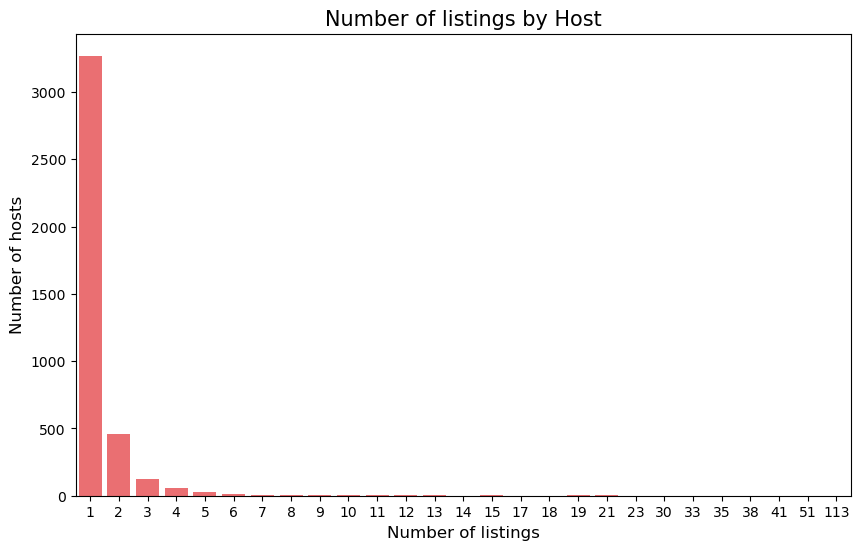

In [50]:
# Host listing numbers graph

# Grouping by host_id and counting the number of listings for each host
listings_per_host = df_listings_clean.groupby('host_id').size()

# Counting the frequency of each count of listings
listings_count = listings_per_host.value_counts().sort_index()

# plot figure
plt.figure(figsize=(10,6))
ax = sns.barplot(x=listings_count.index, y=listings_count.values, data=df_listings_clean, color='#FF5A5F')

# Edit labels
ax.set_title("Number of listings by Host", fontsize=15)
ax.set_xlabel("Number of listings", fontsize = 12)
ax.set_ylabel("Number of hosts", fontsize = 12)
ax.tick_params(axis='x')

plt.show()


Similarly, the barplot that shows the .

In [51]:
# Grouping by host_id and counting the number of listings for each host
reviews_per_listing = df_reviews_clean.groupby('listing_id').size()

# Counting the frequency of each count of listings
reviews_count = reviews_per_listing.value_counts().sort_index()

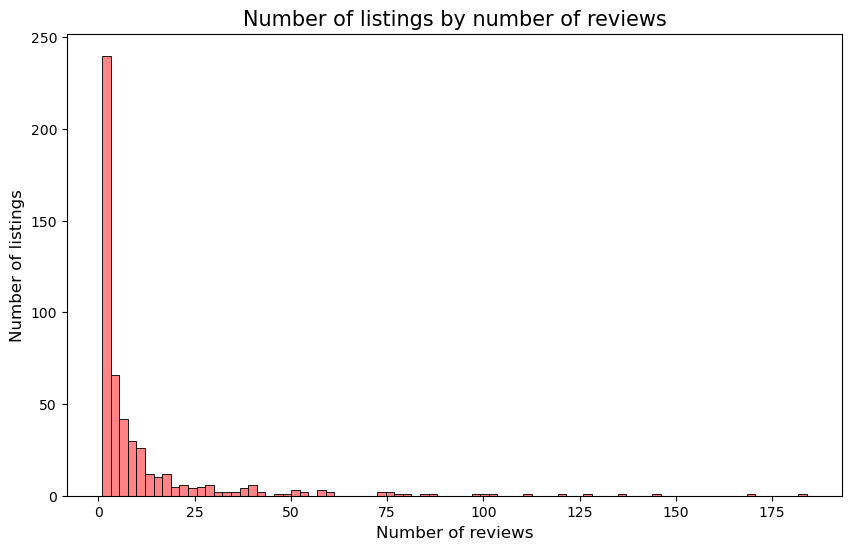

In [52]:
# Listing review numbers graph

# plot figure
plt.figure(figsize=(10,6))

# Barplot shows the number of reviews distributed by the number of listings


# Create grouped barplot
ax = sns.histplot(data=reviews_count.values,color='#FF5A5F')

# Edit labels
ax.set_title("Number of listings by number of reviews", fontsize=15)
ax.set_xlabel("Number of reviews", fontsize = 12)
ax.set_ylabel("Number of listings", fontsize = 12)

#plt.yscale('log')



plt.show()


In [53]:
# df_reviews_clean.groupby('listing_id').count()['id'].sort_values()

Next, we can focus on the rating scores. Let's start by only checking the columns that contains the rating scores in the listing dataset.

In [54]:
df_listings_clean = df_listings_clean.rename(columns={'review_scores_rating': 'review_scores_Overall'})

In [55]:
df_ratings=df_listings_clean[['review_scores_Overall',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]

In [56]:
rating_less_than_4 = []
for i in range(df_ratings.shape[0]):
    for j in df_ratings.columns:
        if df_ratings.loc[i][j] <4:
            rating_less_than_4.append(i)
rating_more_than_4 = ~df_ratings.index.isin(rating_less_than_4)

In [57]:
df_ratings_less_than_4=df_ratings.loc[rating_less_than_4]
df_ratings_more_than_4=df_ratings.loc[rating_more_than_4]

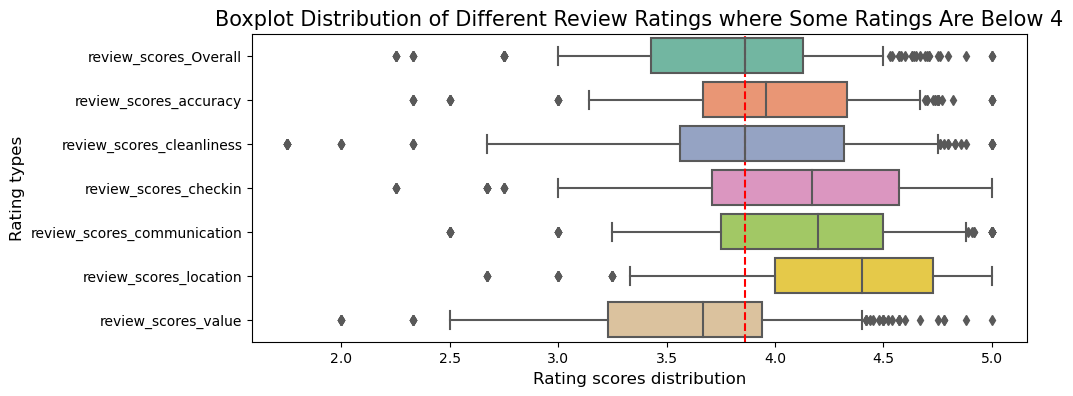

In [58]:
# Draw boxplots for all columns on the same plot using Seaborn
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
ax = sns.boxplot(data=df_ratings_less_than_4, orient='h', palette='Set2', whis=[5, 95])


# Edit labels
ax.set_title("Boxplot Distribution of Different Review Ratings where Some Ratings Are Below 4", fontsize=15)
ax.set_xlabel("Rating scores distribution", fontsize = 12)
ax.set_ylabel("Rating types", fontsize = 12)

# Draw a line on the boxplot
line_position1 = df_ratings_less_than_4['review_scores_Overall'].median()  # Position of the line
plt.axvline(x=line_position1, color='r', linestyle='--')


# Show figure
plt.show()

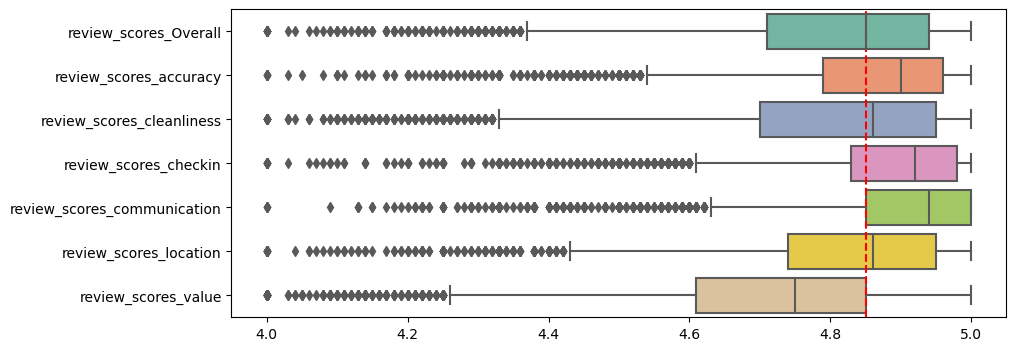

In [59]:
# Draw boxplots for all columns on the same plot using Seaborn
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
sns.boxplot(data=df_ratings_more_than_4, orient='h', palette='Set2')

# Edit labels
ax.set_title("Boxplot Distribution of Different Review Ratings where All Ratings Are Above 4 ", fontsize=15)
ax.set_xlabel("Rating scores distribution", fontsize = 12)
ax.set_ylabel("Rating types", fontsize = 12)

# Draw a line on the boxplot
line_position = df_ratings_more_than_4['review_scores_Overall'].median()   # Position of the line
plt.axvline(x=line_position, color='r', linestyle='--')

#ax.figure.savefig('output_figure.png',dpi=600)
plt.show()

In [60]:
num_cols=df_listings_clean.select_dtypes(exclude='object').columns

<Axes: >

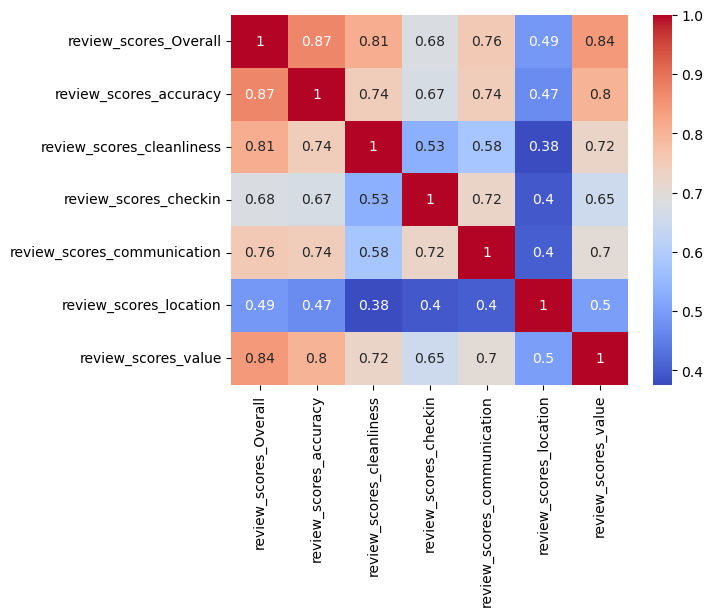

In [61]:
sns.heatmap(df_ratings.corr(),cmap='coolwarm', annot=True )

In [62]:
num_cols_clean=num_cols.drop(['listing_id', 'host_id', 'review_scores_Overall'])

In [63]:
corr_with_ratings=df_listings_clean[num_cols_clean].corrwith(df_listings_clean['review_scores_Overall'])

<Axes: >

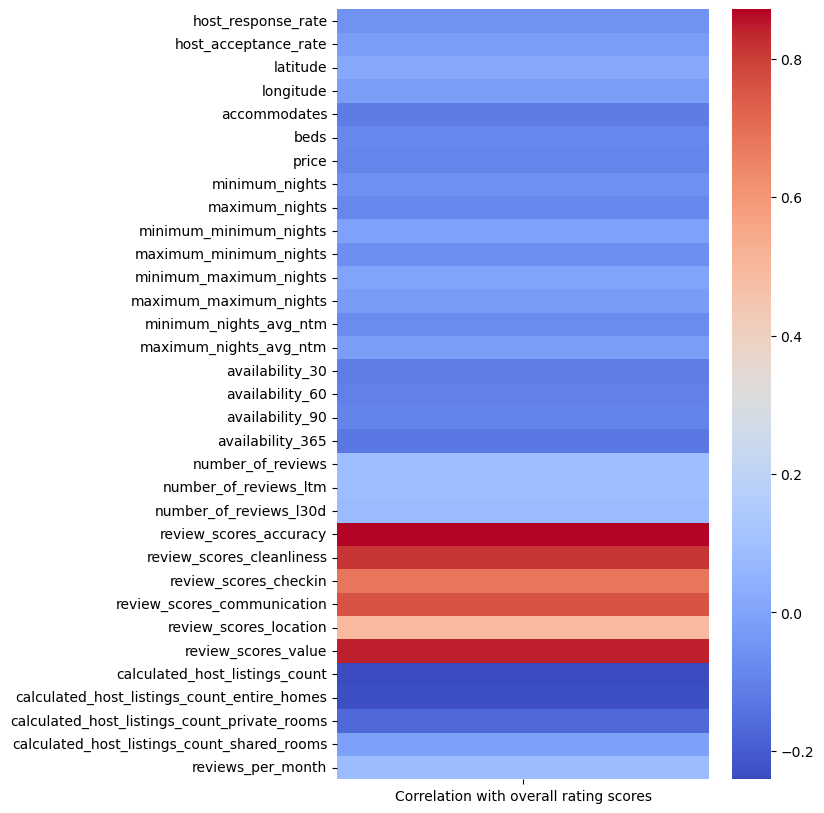

In [64]:
plt.figure(figsize=(6,10))
sns.heatmap(pd.DataFrame(corr_with_ratings, columns=['Correlation with overall rating scores']), cmap='coolwarm')

Average reviews rating by rating type

Distribution of overall ratings

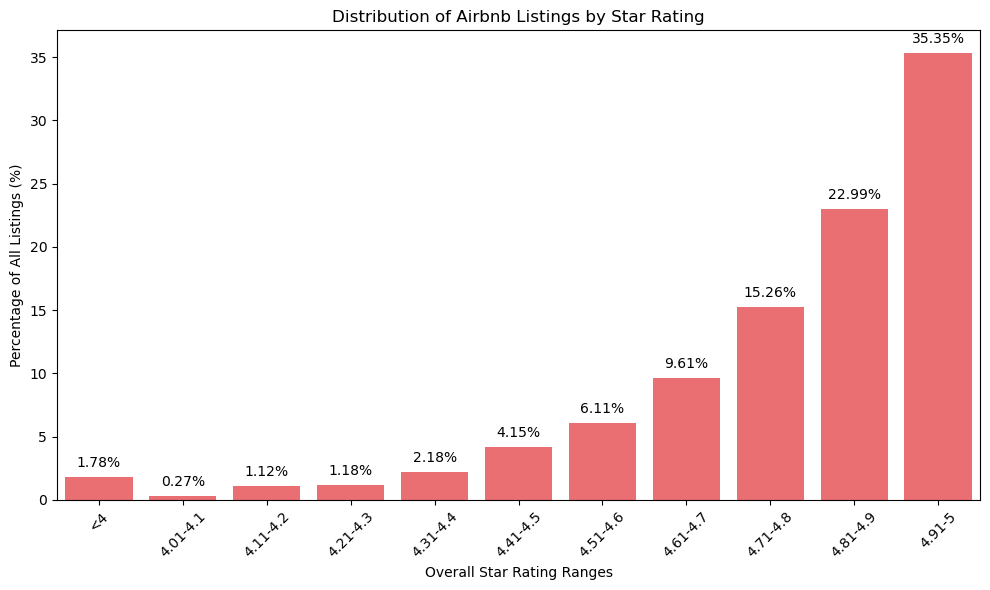

In [65]:
# Define bins and labels for the star rating ranges
bins = [0, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5]
labels = ['<4', '4.01-4.1', '4.11-4.2', '4.21-4.3', '4.31-4.4', '4.41-4.5',
          '4.51-4.6', '4.61-4.7', '4.71-4.8', '4.81-4.9', '4.91-5']

# Bin the data into the specified ranges
overall_ratings_by_range = pd.cut(df_ratings['review_scores_Overall'], bins=bins, labels=labels, include_lowest=True)

# Calculate the percentage of listings in each bin
percentage_df = overall_ratings_by_range.value_counts(normalize=True).sort_index() * 100

# Reset index to have the rating range as a column
percentage_df = percentage_df.reset_index()
percentage_df.columns = ['rating_range', 'percentage']

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='rating_range', y='percentage', data=percentage_df, color='#FF5A5F')

# Annotate each bar
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}%', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')

# Setting the titles and labels
plt.title('Distribution of Airbnb Listings by Star Rating')
plt.xlabel('Overall Star Rating Ranges')
plt.ylabel('Percentage of All Listings (%)')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)


plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

#plt.savefig('Distribution_of_listings_by_rating.jpg', dpi=600)

plt.show()

C:\Users\12276\AppData\Local\Temp\ipykernel_16264\3278172172.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=ratings_mean.index, y=ratings_mean.values, ci=None, color='grey')


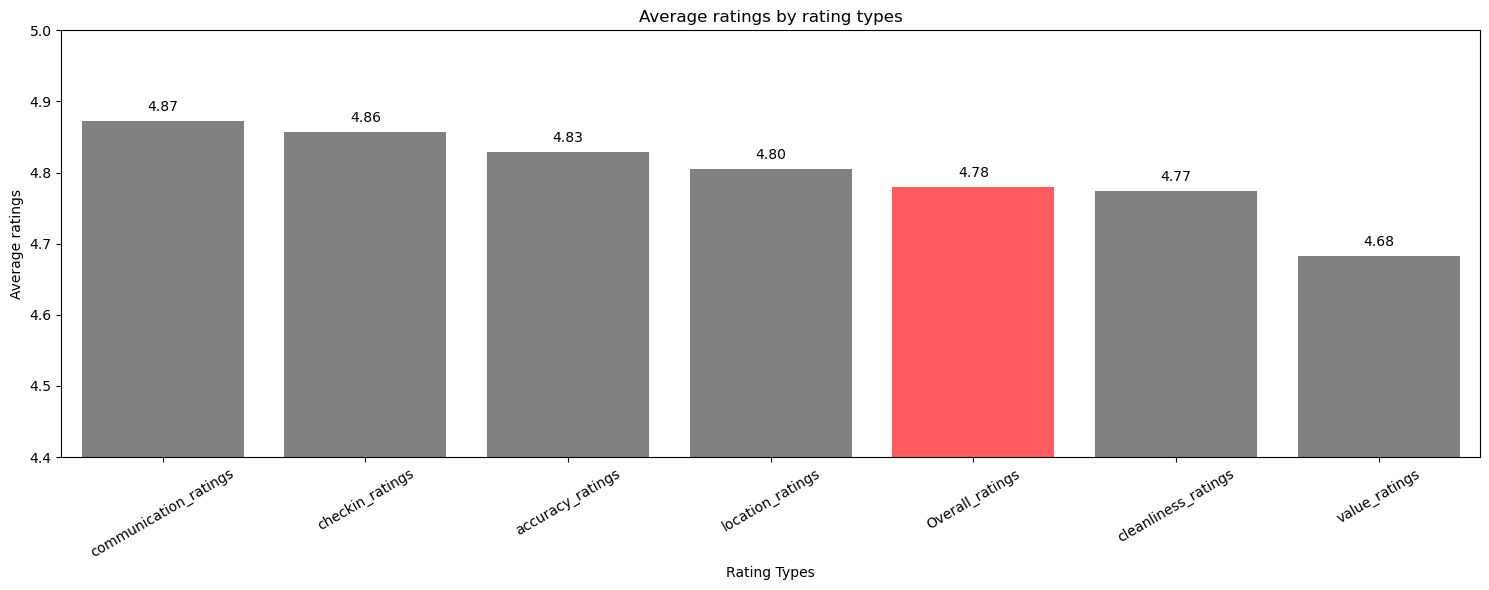

In [66]:
# Calculate the mean ratings for each review rating type including the overall rating
ratings_mean=df_ratings.mean().sort_values(ascending=False)

# Rename index values
ratings_mean=ratings_mean.rename(index={'review_scores_Overall': 'Overall_ratings', 
                                        'review_scores_accuracy': 'accuracy_ratings', 
                                        'review_scores_cleanliness':'cleanliness_ratings',
                                        'review_scores_checkin': 'checkin_ratings', 
                                        'review_scores_communication': 'communication_ratings',
                                        'review_scores_location':'location_ratings',
                                        'review_scores_value': 'value_ratings'})

# Set figure size
plt.figure(figsize=(15,6))

# Creating the barplot
ax = sns.barplot(x=ratings_mean.index, y=ratings_mean.values, ci=None, color='grey')


# Set different color for overall rating
ax.patches[4].set_facecolor('#FF5A5F') 

# Set labels
plt.title('Average ratings by rating types')
plt.xlabel('Rating Types')
plt.ylabel('Average ratings')

ax.set_xticklabels(ratings_mean.index, ha="right")

# Annotate the star ratings for each type of rating
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Change font size of x labels
plt.xticks(ha='center', rotation =30)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)

# Setting y-axis to start from 4.4
plt.ylim(4.4, 5)

# Adjust layout to make room for the rotated x-axis labels
plt.tight_layout()  

#plt.savefig('Average_ratings_by_type.jpg', dpi=600) 
plt.show()

We are interested if cheaper listings tend to have worse reviews.

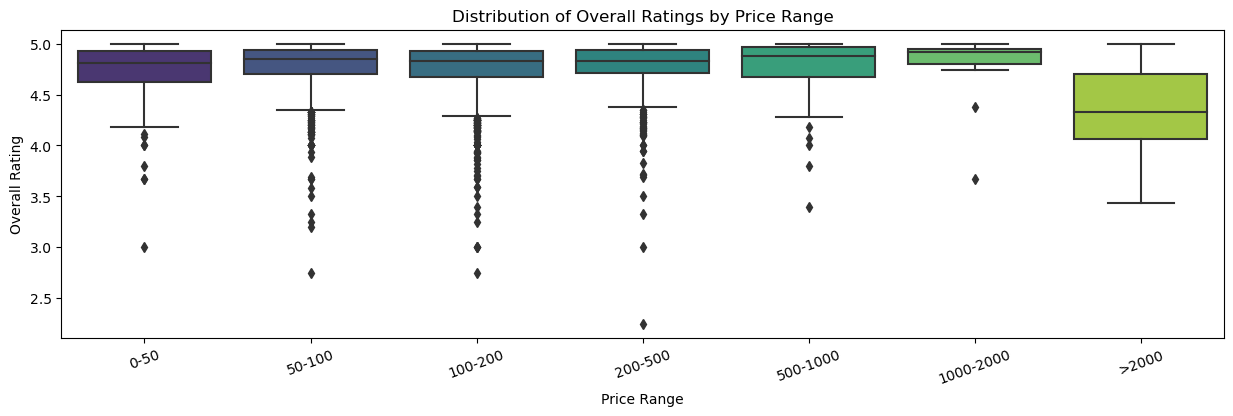

In [67]:
# Define price regions
price_ranges = [(0, 50),(50,100),(100, 200),(200, 500),(500,1000),(1000, 2000),(2000, np.inf)]

# Create dataframe contains price and overall rating information
df_ratings_by_price = df_listings_clean[['price', 'review_scores_Overall']]

# Extract series contain ranges for each row's price
price_by_range=pd.cut(df_ratings_by_price['price'], 
                      bins=[price_range[0] for price_range in price_ranges] + [np.inf], 
                      labels=[f"{price_range[0]}-{price_range[1]}" 
                              if price_range[1] != np.inf 
                              else f">{price_range[0]}" for price_range in price_ranges]
                     )

# Define figure size
plt.figure(figsize=(15, 4))

# Create boxplot
ax=sns.boxplot(x=price_by_range.values, y='review_scores_Overall', data=df_ratings_by_price, palette='viridis')

# Add labels and title
ax.set_title('Distribution of Overall Ratings by Price Range')
ax.set_xlabel('Price Range')
ax.set_ylabel('Overall Rating')
plt.xticks(rotation=20)
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)



# plt.savefig('Distribution_of_ratings_by_price_range.jpg', dpi=600)

plt.show()